In [3]:
import pandas as pd
train = pd.read_csv('./news+aggregator/train.txt', sep="\t", header=0,names=["TITLE","CATEGORY"])
test = pd.read_csv('./news+aggregator/test.txt', sep="\t", header=0,names=["TITLE","CATEGORY"])
valid = pd.read_csv('./news+aggregator/valid.txt', sep="\t", header=0,names=["TITLE","CATEGORY"])
train_X = pd.read_csv('train.feature.txt', sep="\t")
test_X = pd.read_csv('test.feature.txt', sep="\t")
valid_X = pd.read_csv('valid.feature.txt', sep="\t")

from sklearn.linear_model import LogisticRegression
# モデルの学習
lg = LogisticRegression(random_state=64, max_iter=10000)
lg.fit(train_X, train['CATEGORY'])

LogisticRegression(max_iter=10000, random_state=64)

In [4]:
import numpy as np

def score(lg, X):
    pred = lg.predict(X)
    proba = np.max(lg.predict_proba(X), axis=1)
    return pred, proba

train_pred, train_proba = score(lg, train_X)
test_pred, test_proba = score(lg, test_X)
valid_pred, valid_proba = score(lg, valid_X)

print(train_pred)
print(train_proba)

['e' 'b' 'e' ... 'b' 'b' 'b']
[0.86724497 0.44265696 0.77654145 ... 0.94734514 0.58462121 0.82572831]


In [5]:
from sklearn.metrics import accuracy_score

#分類の精度を計算
train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

#表示
print('正解率（学習データ）：{}'.format(train_accuracy))
print('正解率（評価データ）：{}'.format(valid_accuracy))
print('正解率（テストデータ）：{}'.format(test_accuracy))

正解率（学習データ）：0.931784107946027
正解率（評価データ）：0.8883058470764618
正解率（テストデータ）：0.9017991004497751


<Axes: ylabel='TARGET'>

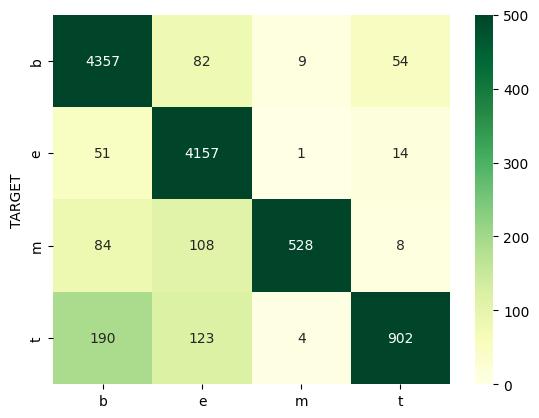

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#混合行列の作成(縦軸がラベル、横軸が予測した値)
train_cm = confusion_matrix(train['CATEGORY'], train_pred)
#作成した混合行列をデータフレーム化
cm = pd.DataFrame(train_cm, columns=['b', 'e', 'm', 't'])
cm['TARGET'] = ['b', 'e', 'm', 't']
cm = cm.set_index('TARGET')
#色の濃淡や色相でデータを表す
sns.heatmap(cm, vmin=0, vmax=500, annot=True, fmt='d', cmap='YlGn')